In [2]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from pandas_visual_analysis import VisualAnalysis
import dtale

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [117]:
df = pd.read_csv("training_data.csv")
df.head()

,patient_id,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,gender,age_group
0,0,WBC,579.00,10^3/μl,2019-07-02 1:19:04,10.0,4.0,male,old
1,1,T4,5.00,μg/dl,2019-07-02 1:19:04,12.0,4.5,male,old
2,2,WBC,6.81,10^3/μl,2019-05-06 14:07:52,10.0,4.0,male,adult
3,3,T4,5.70,μg/dl,2019-05-06 14:07:52,12.0,4.5,male,adult
4,4,WBC,4.64,10^3/μl,2019-07-21 13:41:00.528523+00:00,10.0,4.0,male,adult


In [105]:
dfch = df[df["standard_lab_parameter_name"] == "Chloride"]

In [106]:
dfch = dfch[dfch.patient_id != 164]

In [107]:
dfch

,patient_id,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,gender,age_group
7,7,Chloride,105.3,mmol/l,2019-06-30 13:45:08.198299+00:00,107.0,98.0,male,adult
12,12,Chloride,107.0,mmol/l,2019-07-22 10:08:28.843087+00:00,108.0,98.0,male,adult
23,23,Chloride,106.5,mmol/l,2019-01-26 05:37:04.917295+00:00,109.0,99.0,male,old
30,30,Chloride,98.0,mmol/l,2019-02-21 17:58:54.644089+00:00,107.0,98.0,male,adult
46,46,Chloride,101.9,mmol/l,2019-06-05 09:28:52.365281+00:00,109.0,101.0,male,old
...,...,...,...,...,...,...,...,...,...
9964,9964,Chloride,100.0,mmol/l,2019-09-09 05:28:23.806159+00:00,108.0,98.0,male,adult
9973,9973,Chloride,103.0,mmol/l,2019-09-25 10:29:21.076645+00:00,107.0,98.0,male,adult
9981,9981,Chloride,102.0,mmol/l,2019-11-20 13:16:24.581529+00:00,107.0,98.0,male,adult
9984,9984,Chloride,101.0,mmol/l,2019-09-18 08:41:08.230925+00:00,107.0,98.0,male,adult


In [113]:
dfch.describe()

,patient_id,parameter_value,reference_high,reference_low
count,1195.000000,1195.000000,1195.000000,1195.000000
mean,4967.375732,101.655238,106.737004,96.736603
std,2881.862511,11.918739,14.498676,11.780152
min,7.000000,0.670000,4.160000,0.670000
25%,2438.000000,101.000000,107.000000,98.000000
50%,5068.000000,103.000000,107.000000,98.000000
75%,7459.500000,105.000000,107.000000,98.000000
max,9989.000000,192.000000,250.000000,101.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



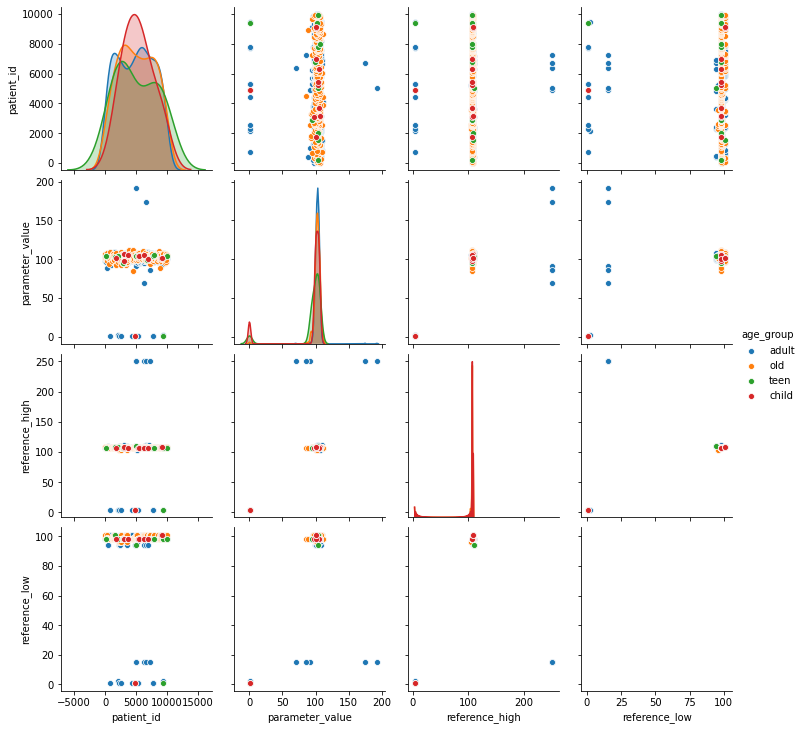

In [114]:
sns.pairplot(dfch,hue='age_group')


In [115]:
dfchhigh = dfch[dfch.parameter_value > dfch.reference_high]
dfchlow = dfch[dfch.parameter_value < dfch.reference_low]

In [116]:
dfchlow

,patient_id,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,gender,age_group
178,178,Chloride,96.0,mmol/l,2019-10-22 06:07:54.253663+00:00,107.0,98.0,male,adult
305,305,Chloride,100.0,meq/l,2019-12-12 19:09:44,109.0,101.0,male,old
306,306,Chloride,100.0,meq/l,2019-12-12 19:09:44,109.0,101.0,male,adult
339,339,Chloride,97.2,mmol/l,2019-02-19 10:34:05,109.0,99.0,male,old
372,372,Chloride,89.0,mmol/l,2019-11-21 18:08:15.986254+00:00,107.0,98.0,male,adult
...,...,...,...,...,...,...,...,...,...
9157,9157,Chloride,94.0,mmol/l,2019-09-03 16:41:34,108.0,98.0,male,adult
9359,9359,Chloride,98.2,mmol/l,2019-12-19 14:58:39.395840+00:00,109.0,101.0,male,adult
9691,9691,Chloride,95.0,mmol/l,2019-11-28 14:17:07.986531+00:00,108.0,98.0,male,old
9868,9868,Chloride,97.0,meq/l,2019-11-24 04:37:30.605214+00:00,107.0,98.0,male,old


Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\dash\dash.py", line 1078, in dispatch
    r

2021-03-03 21:01:53,610 - ERROR    - Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\dash\d

In [110]:
dfchhigh = dfchhigh.drop(['reference_high','reference_low', 'unit'], axis=1)


In [111]:
dfchlow = dfchlow.drop(['reference_high','reference_low', 'unit'], axis=1)


In [112]:
dtale.show(dfchlow)


In [48]:
dfchtest = pd.read_csv("test_data.csv")
dfchtest.head()

,Unnamed: 0,patient_id,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,age_group
0,0,0,WBC,8.10,10^3/μl,2020-01-05 09:06:51.396116+00:00,10.0,4.0,adult
1,1,1,T4,13.00,μg/dl,2020-11-03 09:16:15.785961+00:00,12.0,4.5,adult
2,2,2,T4,7.10,μg/dl,2020-10-31 02:25:49.721427+00:00,12.0,4.5,adult
3,3,3,WBC,5.62,10^3/μl,2020-10-31 02:25:49.721427+00:00,10.0,4.0,adult
4,4,4,WBC,9350.00,/cmm,2020-11-02 12:57:39.535672+00:00,10000.0,4000.0,old


In [49]:
dfchtest = dfchtest[dfchtest["standard_lab_parameter_name"] == "Chloride"]

In [50]:
dfchtest

,Unnamed: 0,patient_id,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,age_group
11,11,11,Chloride,98.0,mmol/l,2020-11-02 01:56:11.843194+00:00,107.0,98.0,old
20,20,20,Chloride,108.0,mmol/l,2020-11-04 02:21:16.545518+00:00,107.0,98.0,old
25,25,25,Chloride,108.0,mmol/l,2020-10-14 08:17:21.975061+00:00,107.0,98.0,adult
30,30,30,Chloride,99.0,mmol/l,2020-11-03 14:21:44.771536+00:00,107.0,98.0,old
36,36,36,Chloride,98.0,mmol/l,2020-11-14 03:20:25.940923+00:00,107.0,98.0,old
...,...,...,...,...,...,...,...,...,...
9967,9967,9967,Chloride,102.0,mmol/l,2020-11-13 18:46:29.914046+00:00,107.0,98.0,adult
9976,9976,9976,Chloride,106.1,mmol/l,2020-11-07 18:34:14.413848+00:00,107.0,98.0,adult
9981,9981,9981,Chloride,110.0,mmol/l,2020-11-15 14:57:53.806698+00:00,107.0,98.0,adult
9989,9989,9989,Chloride,103.0,mmol/l,2020-10-30 07:57:21.293749+00:00,109.0,101.0,adult


,patient_id,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,age_group
0,11,Chloride,98.0,mmol/l,2020-11-02 01:56:11.843194+00:00,107.0,98.0,old
1,20,Chloride,108.0,mmol/l,2020-11-04 02:21:16.545518+00:00,107.0,98.0,old
2,25,Chloride,108.0,mmol/l,2020-10-14 08:17:21.975061+00:00,107.0,98.0,adult
3,30,Chloride,99.0,mmol/l,2020-11-03 14:21:44.771536+00:00,107.0,98.0,old
4,36,Chloride,98.0,mmol/l,2020-11-14 03:20:25.940923+00:00,107.0,98.0,old


In [51]:
profile = ProfileReport(dfch, title='Train Report', explorative=True)


In [52]:
profile.to_widgets()


In [53]:
dtale.show(dfch)


In [11]:
profile = ProfileReport(dfchtest, title='Test Report', explorative=True)


In [12]:
profile.to_widgets()


In [128]:
dfcom = pd.read_csv("chloride combined.csv")
dfcom.head()

,patient_id,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,age_group
0,7,Chloride,105.3,mmol/l,2019-06-30 13:45:08.198299+00:00,107.0,98.0,adult
1,11,Chloride,98.0,mmol/l,2020-11-02 01:56:11.843194+00:00,107.0,98.0,old
2,12,Chloride,107.0,mmol/l,2019-07-22 10:08:28.843087+00:00,108.0,98.0,adult
3,20,Chloride,108.0,mmol/l,2020-11-04 02:21:16.545518+00:00,107.0,98.0,old
4,23,Chloride,106.5,mmol/l,2019-01-26 05:37:04.917295+00:00,109.0,99.0,old


In [129]:
dfcom = dfcom[dfcom.patient_id != 164]

In [130]:
dfcom

,patient_id,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,age_group
0,7,Chloride,105.3,mmol/l,2019-06-30 13:45:08.198299+00:00,107.0,98.0,adult
1,11,Chloride,98.0,mmol/l,2020-11-02 01:56:11.843194+00:00,107.0,98.0,old
2,12,Chloride,107.0,mmol/l,2019-07-22 10:08:28.843087+00:00,108.0,98.0,adult
3,20,Chloride,108.0,mmol/l,2020-11-04 02:21:16.545518+00:00,107.0,98.0,old
4,23,Chloride,106.5,mmol/l,2019-01-26 05:37:04.917295+00:00,109.0,99.0,old
...,...,...,...,...,...,...,...,...
2421,9981,Chloride,110.0,mmol/l,2020-11-15 14:57:53.806698+00:00,107.0,98.0,adult
2422,9984,Chloride,101.0,mmol/l,2019-09-18 08:41:08.230925+00:00,107.0,98.0,adult
2423,9989,Chloride,103.8,mmol/l,2019-09-07 02:01:41.948413+00:00,107.0,98.0,adult
2424,9989,Chloride,103.0,mmol/l,2020-10-30 07:57:21.293749+00:00,109.0,101.0,adult


In [150]:
dtale.show(dfcom)

Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\dash\dash.py", line 1078, in dispatch
    r

2021-03-03 22:20:59,509 - ERROR    - Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\dash\d

Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\dash\dash.py", line 1078, in dispatch
    r

2021-03-03 22:25:40,500 - ERROR    - Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\dash\d

Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\dash\dash.py", line 1078, in dispatch
    r

2021-03-03 22:28:59,854 - ERROR    - Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\dash\d

In [134]:
dfhigh = dfcom[dfcom.parameter_value > dfcom.reference_high]
dflow = dfcom[dfcom.parameter_value < dfcom.reference_low]

In [139]:
dflow

,patient_id,standard_lab_parameter_name,parameter_value,unit,created_at,reference_high,reference_low,age_group
9,45,Chloride,96.0,mmol/l,2020-10-30 05:59:55.464793+00:00,107.0,98.0,adult
40,178,Chloride,96.0,mmol/l,2019-10-22 06:07:54.253663+00:00,107.0,98.0,adult
71,305,Chloride,100.0,meq/l,2019-12-12 19:09:44,109.0,101.0,old
72,306,Chloride,100.0,meq/l,2019-12-12 19:09:44,109.0,101.0,adult
78,339,Chloride,97.2,mmol/l,2019-02-19 10:34:05,109.0,99.0,old
...,...,...,...,...,...,...,...,...
2385,9845,Chloride,97.0,mmol/l,2020-11-04 14:57:24.332963+00:00,107.0,98.0,adult
2391,9868,Chloride,97.0,meq/l,2019-11-24 04:37:30.605214+00:00,107.0,98.0,old
2398,9891,Chloride,96.0,mmol/l,2019-09-14 04:09:42.668621+00:00,107.0,98.0,adult
2399,9897,Chloride,91.0,mmol/l,2020-11-12 07:48:10.316098+00:00,107.0,98.0,old


In [140]:
dtale.show(dfhigh)


Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\dash\dash.py", line 1078, in dispatch
    r

2021-03-03 21:57:12,158 - ERROR    - Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\dash\d

Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\dash\dash.py", line 1078, in dispatch
    r

2021-03-03 21:57:24,514 - ERROR    - Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\dash\d

Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\dash\dash.py", line 1078, in dispatch
    r

2021-03-03 21:58:10,008 - ERROR    - Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\ProgramData\Anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\dash\d

In [141]:
dtale.show(dflow)


In [149]:
if isinstance(dfhigh, (pd.DatetimeIndex, pd.MultiIndex)):dfhigh = dfhigh.to_frame(index=False)

dfhigh = dfhigh.reset_index().drop('index', axis=1, errors='ignore')
dfhigh.columns = [str(c) for c in dfhigh.columns] 
chart_data = pd.concat([dfhigh['age_group'],dfhigh['parameter_value'],], axis=1)
chart_data = chart_data.sort_values(['age_group'])
chart_data = chart_data.rename(columns={'age_group': 'x'})
chart_data = chart_data.groupby(['x'])[['parameter_value']].count().reset_index()
chart_data = chart_data.dropna()
chart_data = chart_data[chart_data['parameter_value'] > 0] 

import plotly.graph_objs as go


#chart = go.Pie(labels=chart_data['x'], y=chart_data['parameter_value'])
#figure = go.Figure(data=[chart], layout=go.Layout({'legend': {'orientation': 'h'}, 'title': {'text': 'parameter_value by age_group (Count)'}}))
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)
#chart.pop('id', None) # for some reason iplot does not like 'id'
#iplot(chart)


In [3]:
dfcomsort = pd.read_csv("chloridecombinedsortedtime.csv")
dfcomsort.head()

,patient_id,standard_lab_parameter_name,parameter_value,unit,reference_high,reference_low,age_group,Year,Month,Day,Unnamed: 10,Time
0,7653,Chloride,106.9,mmol/l,109.0,99.0,old,2019,1,1,NaN,9:46:53
1,2165,Chloride,104.1,mmol/l,109.0,99.0,adult,2019,1,2,NaN,10:31:06
2,1219,Chloride,100.3,mmol/l,109.0,99.0,old,2019,1,2,NaN,17:52:12
3,6645,Chloride,107.4,mmol/l,109.0,99.0,adult,2019,1,4,NaN,14:01:37
4,2071,Chloride,106.0,mmol/l,107.0,98.0,adult,2019,1,5,NaN,0:58:18


In [4]:
dtale.show(dfcomsort)


2021-03-04 17:25:08,732 - INFO     - NumExpr defaulting to 8 threads.
